## 1.1 Multiple Features 多维特征
    Now thera are lots of features
    We use x1、x2、x3 ... to decribe
    
    n = number of features
    
    for example:
        Previously, we only considered the size of the house
        Multiple Features: We consider factors such as area, floor, rooms, etc
    
    x_i used to be a featuer
    but now it's considered a vector(向量)
    and it contains all the features
    
    previously: f_w,b(x) = wx + b
    But now: f_w,b(x) = w1x1 + w2x2 + ... + wnxn + b
    
    vector(w) = [w1 w2 w3 ... wn] and it's a row vector
    b : is a number
    vector(x) = [x1 x2 x3 ... xn] and also a row vector
    
    so f_w,b(x) = vector(w) · vector(x) + b
   ##### the module is Multiple Linear Regression

## 1.2 Vectorization Part1 向量化

In [2]:
# 使用np.dot(x,y) 来实现向量 x 和 y的点乘操作
# for eg
import numpy as np

w = np.array([1.0, 2.5, -3.3])
b = 4
x = np.array([10, 20, 30])
f = np.dot(w, x) + b
print(f)

-35.0


## 1.3 Vectorization Part2 向量化
    for update w
    We can still use vector
    vector(w) = vector(w) - alpha*vector(d)
    vector(d) 代表着对每项w求偏导后组成的偏导的向量

## 1.4 GD for Multiple Regression 用于多元线性回归的梯度下降

![img1](./img/01.png)

    对于下图进行 多远线性回归的梯度下降

![img2](./img/02.png)

In [42]:
import numpy as np

# 获得训练数据
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

m , n = x_train.shape

# 获得cost function
def cost_function(x, y, w, b):
    
    cost = 0
    
    for i in range(m):
        y_temp = np.dot(x[i], w) + b
        cost = cost + (y_temp - y[i])**2
    
    return cost/(2*m)

# 获得 w 与 b 的偏导
def compute_gradient(x, y, w, b):
    
    dw = np.zeros((n,))
    db = 0
    
    for i in range(m):
        delta = np.dot(x[i], w) + b - y[i]
        for j in range(n):
            dw[j] = dw[j] + delta * x[i][j] 
        db = db + delta
        
    return dw/m , db/m

# 开始计算
def gradient_descent(x, y, w_init, b_init, times, alpha):
    w = w_init
    b = b_init
    J_history = [cost_function(x, y, w, b)]
    
    for i in range(times):
        
        dw, db = compute_gradient(x, y, w, b)
        w = w - alpha*dw
        b = b - alpha*db
        
        J_history.append(cost_function(x, y, w, b))
    
    return w, b, J_history

w_init = np.zeros((n,))
b_init = 0

times = 10000
alpha = 5.0e-7

w_finnal, b_finnal, J_history = gradient_descent(x_train, y_train, w_init, b_init, times, alpha)

print(J_history)

[49518.0, 2529.4629522316304, 765.8336829952988, 699.6290280210446, 697.1337425623095, 697.0296591788104, 697.0153256006653, 697.0043615139087, 696.9935248096691, 696.9826938019223, 696.9718639233548, 696.9610350024587, 696.9502070327148, 696.939380013799, 696.9285539456151, 696.9177288280792, 696.9069046611058, 696.8960814446137, 696.8852591785139, 696.8744378627272, 696.8636174971624, 696.852798081742, 696.8419796163756, 696.8311621009815, 696.8203455354765, 696.8095299197731, 696.7987152537909, 696.7879015374392, 696.7770887706384, 696.7662769533032, 696.7554660853489, 696.7446561666906, 696.7338471972458, 696.7230391769273, 696.7122321056518, 696.7014259833372, 696.6906208098934, 696.6798165852423, 696.6690133092947, 696.6582109819711, 696.6474096031822, 696.6366091728472, 696.6258096908772, 696.615011157195, 696.6042135717122, 696.5934169343424, 696.5826212450056, 696.5718265036138, 696.5610327100843, 696.5502398643335, 696.5394479662783, 696.5286570158306, 696.517867012907, 696.5

## 2.1 Feature Scaling Part1 特征缩放
    特征缩放（Feature scaling）是指将特征值按照比例缩放，使得所有特征值的范围都在差不多的数值范围内。特征缩放的目的是为了加速机器学习算法的收敛速度，同时提高算法的准确度。

## 2.2 Part2

   - Mean normalization 均值归一化
   
    x = (x - average)/(max - min)   均值归一化得到的值有正有负
    
   - Z-score normalization
   
    x = (x - average)/sigma    sigma就是数据的标准差
  
    对上述代码进行特征缩放

In [45]:
import numpy as np

# 获得训练数据
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

m, n = x_train.shape

# 特征缩放
# axis = 0表示在列上进行操作
# 对每一列求平均值
mean = np.mean(x_train, axis=0)
# 对每一列求标准差
std = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean) / std

print(mean)
print(std)

[1.45733333e+03 3.33333333e+00 1.33333333e+00 4.00000000e+01]
[5.11961804e+02 1.24721913e+00 4.71404521e-01 4.08248290e+00]


## 2.3 Checking GD for Convergence 判断梯度下降是否收敛
    
    We can drew a iterations-J(w,b) plot to see
    and it's called a learning curve
    
    also we can use Automatic convergence test 
    
    LET 'epsilon' be a small number (like 0.0001)
    If J(w,b) decreases by <= epsilon in one iteration
    It declare convergence

## 2.4 Choosing the Learning Rate 如何设置学习率
    With a small enough alpha, J(w,b) should decrease on every iteration
    If not, it means that there may be bugs in your code
    
    Values of alpha to try:
        ... 0.001   0.01   0.1    1...
    
    以下代码来自ChatGPT4.0 不包括注释

[48254.77176163629, 47033.05093759326, 45851.04696506807, 44707.061753020476, 43599.48449252559, 42526.786767779355, 41487.51795014236, 40480.300858643976, 39503.82767134305, 38556.85607285975, 37638.2056242557, 36746.75434225322, 35881.43547554831, 35041.23446669245, 34225.18608869542, 33432.37174613871, 32661.916931189597, 31912.98882546966, 31184.794039264045, 30476.57648005707, 29787.615342850724, 29117.223215165726, 28464.74429004158, 27829.5526807443, 27211.050831260134, 26608.668017000706, 26021.858930472496, 25450.10234697111, 24892.899865650692, 24349.774721591537, 23820.270664745432, 23303.950901879994, 22800.39709787051, 22309.208432901738, 21830.000712343506, 21362.405526253646, 20906.069455639812, 20460.65332278015, 20025.831483060265, 19601.29115593317, 19186.731792748476, 18781.86447932921, 18386.411371298364, 18000.105160274175, 17622.68856916304, 17253.913874882277, 16893.542456942334, 16541.344370409643, 16197.097941857764, 15860.589386995207, 15531.612448735235, 1520

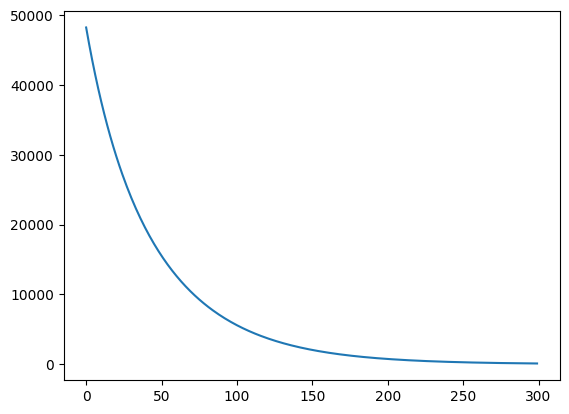

[ 38.13057306  41.45552084 -29.74363777  36.49207029]
275.778140719327


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 特征缩放
def feature_scaling(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

# 代价函数
def cost_function(X, y, w, b):
    m = len(y)
    # 这里是矩阵相乘
    # 得到的是一个所有预测值组成的列向量prediction
    prediction = X @ w.T + b
    # 这里prediction - y后再平方 再用np.sum可以得到整个向量之和
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2)
    return cost

# 梯度下降
def gradient_descent(X, y, alpha, iterations):
    m = len(y)
    # 这里给定了初始参数 w b均为0
    w = np.zeros(X.shape[1])
    b = 0
    cost_history = []

    for _ in range(iterations):
        hypothesis = X @ w.T + b
        loss = hypothesis - y
        # 这里的矩阵乘法可以让x_i与其对应的loss_i相乘后再相加
        w_gradient = (X.T @ loss) / m
        b_gradient = np.sum(loss) / m
        # 迭代
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient
        # 记录损失
        cost_history.append(cost_function(X, y, w, b))

    return w, b, cost_history

# 训练数据
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# 特征缩放
x_train_scaled = feature_scaling(x_train)

# 选择学习率和迭代次数
alpha = 0.01
iterations = 300

# 使用梯度下降训练模型
w, b, cost_history = gradient_descent(x_train_scaled, y_train, alpha, iterations)

# 输出损失函数
print(cost_history)

# 画出学习率图
iteration = range(iterations)
plt.plot(iteration, cost_history)
plt.show()

# 输出参数
print(w)
print(b)

## 2.5 Feature Engineering 特征工程
     Feature engineering特征工程 的目的就是选择、找到一个更好的Feature为的是predictive models预测模型更加准确。

## 2.6 Polynomial Regression 多项式回归
    研究一个因变量与一个或多个自变量间多项式的回归分析方法，称为多项式回归
    
    like f(w,b) = w1x + w2x^2 + w3x^3 + ....
    
    